In [3]:
%%capture
from pathlib import Path

if Path.cwd().stem == "features":
    %cd ../..
    %load_ext autoreload
    %autoreload 2

In [4]:
import logging

import holoviews as hv
import hvplot.polars  # noqa
import polars as pl

from src.data.database_manager import DatabaseManager
from src.features.quality_checks import check_sample_rate
from src.features.scaling import scale_min_max, scale_percent_to_decimal, scale_standard
from src.features.transformations import interpolate
from src.log_config import configure_logging

configure_logging(
    stream_level=logging.DEBUG, ignore_libs=["matplotlib", "Comm", "bokeh", "tornado"]
)

pl.Config.set_tbl_rows(12)  # for the 12 trials
hv.output(widget_location="bottom", size=130)

In [7]:
features = [
    "Temperature",
    "Rating",
    "Engagement",
    "Valence",
    "Sentimentality",
    "Confusion",
    "Neutral",
    "Attention",
    "Brow Furrow",
    "Brow Raise",
    "Cheek Raise",
    "Chin Raise",
    "Dimpler",
    "Eye Closure",
    "Eye Widen",
    "Inner Brow Raise",
    "Jaw Drop",
    "Lip Corner Depressor",
    "Lip Press",
    "Lip Pucker",
    "Lip Stretch",
    "Lip Suck",
    "Lid Tighten",
    "Mouth Open",
    "Nose Wrinkle",
    "Smile",
    "Smirk",
    "Upper Lip Raise",
]

# features = ["Temperature", "Rating", "EDA_Tonic", "EDA_RAW"]
# multiple_eda_plus_rating = interpolate(multiple_eda_plus_rating)
# multiple_eda_plus_rating = scale_min_max(
#     multiple_eda_plus_rating, exclude_additional_columns=["Temperature", "Rating"]
# )
# stimuli.hvplot(
#     x="Timestamp",
#     y=features,
#     groupby=["Trial"],
#     kind="line",
#     width=800,
#     height=400,
#     ylim=(0, 1),
# )

In [8]:
db = DatabaseManager()

In [9]:
with db:
    df = db.execute("SELECT * FROM Raw_Face LIMIT 1000").pl()
df

trial_id,trial_number,participant_id,rownumber,timestamp,samplenumber,anger,contempt,disgust,fear,joy,sadness,surprise,engagement,valence,sentimentality,confusion,neutral,attention,brow_furrow,brow_raise,cheek_raise,chin_raise,dimpler,eye_closure,eye_widen,inner_brow_raise,jaw_drop,lip_corner_depressor,lip_press,lip_pucker,lip_stretch,lip_suck,lid_tighten,mouth_open,nose_wrinkle,smile,smirk,upper_lip_raise,blink,blinkrate,pitch,yaw,roll,interocular_distance
u16,u8,u8,u32,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64
1,1,1,8811,294350.9838,8803,0.12518,0.181806,0.023876,0.024252,0.02624,0.124534,0.061223,0.328766,0.0,0.036173,0.036173,99.636383,98.484863,0.036173,0.435721,0.286314,0.000047,0.341293,0.000226,0.065865,0.086099,1.865428,2.3786e-7,0.002053,4.7822e-7,0.006318,0.000696,0.000105,0.479706,0.007313,0.642375,0.0,0.000326,0,18,-23.710371,-1.128007,3.344138,99.168541
1,1,1,8814,294450.0503,8806,0.125883,0.184421,0.023928,0.02429,0.025578,0.125019,0.060915,0.328766,0.0,0.032122,0.032122,99.631157,98.625015,0.032122,0.378975,0.176308,0.000043,0.049774,0.000485,0.102114,0.05119,1.799533,1.9135e-7,0.001091,0.000001,0.00288,0.00058,0.000139,0.356424,0.006213,0.469142,0.0,0.000254,0,18,-24.764748,-0.635587,2.434715,98.594276
1,1,1,8817,294549.6316,8809,0.126686,0.188357,0.023969,0.02443,0.024682,0.126219,0.058203,0.328766,0.0,0.070808,0.070808,99.623291,98.602272,0.070808,0.361488,0.065987,0.000024,0.0,0.000516,0.126224,0.048451,0.702215,0.000001,0.000179,0.000005,0.001249,0.000078,0.000076,0.1413,0.007088,0.205794,0.0,0.000226,0,18,-23.246853,0.718773,2.603575,97.55748
1,1,1,8820,294634.3984,8812,0.127169,0.189015,0.024152,0.024633,0.024491,0.126433,0.061399,0.328766,0.0,0.131433,0.131433,99.621964,98.427483,0.131433,0.50136,0.072655,0.000024,0.0,0.000723,0.070128,0.02319,1.927209,0.000003,0.000121,0.000007,0.000954,0.000056,0.000321,0.276765,0.010896,0.132758,0.0,0.001234,0,18,-23.466768,1.316812,2.526687,98.262718
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,1,1,11832,395286.4867,11824,0.128202,0.192468,0.024192,0.024337,0.024224,0.127923,0.058489,0.328766,0.0,0.040451,0.214894,99.615059,97.970917,0.214894,0.136328,0.061204,0.000054,0.048274,0.025709,0.004131,0.005297,1.210001,0.000022,0.000026,0.000004,0.000358,0.000301,0.00511,0.191806,0.027277,0.040451,0.0,0.006561,0,36,-22.976252,2.614572,2.660656,94.975121
1,1,1,11835,395377.2433,11827,0.127602,0.191487,0.024168,0.024301,0.024377,0.127376,0.058399,0.328766,0.0,0.072548,0.158441,99.617027,97.831535,0.158441,0.188273,0.109491,0.000114,0.0,0.018786,0.003333,0.004006,1.123189,0.000019,0.000126,0.000003,0.000658,0.000825,0.003907,0.175745,0.041411,0.072548,0.0,0.00473,0,36,-22.821535,2.953871,2.02404,95.346123
1,1,1,11838,395470.9917,11830,0.12834,0.192038,0.024311,0.024361,0.024315,0.127669,0.058189,0.328766,0.0,0.060731,0.193765,99.615921,97.988724,0.193765,0.143985,0.08788,0.00005,0.0,0.029756,0.003865,0.003603,1.081137,0.000036,0.000034,0.000002,0.000376,0.000351,0.008553,0.31521,0.052814,0.060731,0.0,0.010655,0,30,-24.068541,2.569572,2.561313,95.144325


In [ ]:
participant_number = 0
modality = "affectiva"
data_config = RAW_DICT[modality]
sampling_rate = 9  # data_config.sampling_rate


affectiva_raw = load_dataset(
    PARTICIPANT_LIST[participant_number], RAW_DICT[modality]
).dataset
temperature = load_dataset(
    PARTICIPANT_LIST[participant_number], RAW_DICT["temperature"]
).dataset
rating = load_dataset(PARTICIPANT_LIST[participant_number], RAW_DICT["rating"]).dataset

affectiva_raw = affectiva_raw.unique("Timestamp").sort("Timestamp")
logging.warning("Working with unique timestamps.")

check_sample_rate(affectiva_raw)
check_sample_rate(affectiva_raw, unique_timestamp=True)

13:16:22 | DEBUG   | make_dataset | Dataset 'affectiva' for participant 005_leo loaded from data/raw/005_leo/005_leo_affectiva.csv


KeyError: 'temperature'

In [ ]:
participant_number = 2
modality = "affectiva"
data_config = RAW_DICT[modality]
sampling_rate = 9  # data_config.sampling_rate


affectiva_raw = load_dataset(
    PARTICIPANT_LIST[participant_number], RAW_DICT[modality]
).dataset
temperature = load_dataset(
    PARTICIPANT_LIST[participant_number], RAW_DICT["temperature"]
).dataset
rating = load_dataset(PARTICIPANT_LIST[participant_number], RAW_DICT["rating"]).dataset

affectiva_raw = affectiva_raw.unique("Timestamp").sort("Timestamp")
logging.warning("Working with unique timestamps.")

check_sample_rate(affectiva_raw)
check_sample_rate(affectiva_raw, unique_timestamp=True)

17:53:49 | DEBUG   | process_data | Dataset 'affectiva' for participant 003_pilot_noah loaded from data/raw/003_pilot_noah/003_pilot_noah_affectiva.csv
17:53:49 | DEBUG   | process_data | Dataset 'temperature' for participant 003_pilot_noah loaded from data/raw/003_pilot_noah/003_pilot_noah_temperature.csv
17:53:49 | DEBUG   | process_data | Dataset 'rating' for participant 003_pilot_noah loaded from data/raw/003_pilot_noah/003_pilot_noah_rating.csv
17:53:49 | WARNING | root | Working with unique timestamps.
17:53:49 | DEBUG   | quality_check | Sample rate per trial: [9.82 9.82 8.12]
17:53:49 | INFO    | quality_check | The mean sample rate is 9.25.
17:53:49 | WARNING | quality_check | Sample rate varies more than 0.5% between trials: 10.57% (coefficient of variation).
17:53:49 | DEBUG   | quality_check | Sample rate per trial: [9.82 9.82 8.12]
17:53:49 | INFO    | quality_check | The mean sample rate is 9.25.
17:53:49 | WARNING | quality_check | Sample rate varies more than 0.5% betwe

In [ ]:
# TODO: list features relevant for pain

In [ ]:
eda_raw_trials = [
    group.select("Anger").to_numpy().flatten()
    for _, group in affectiva_raw.group_by(["Trial"])
]
eda_raw_trial = eda_raw_trials[0]

"""Same as:
# Get each trial as a separate np.array
groups = eda_raw.group_by(["Trial"], maintain_order=True)
eda_raw_trials = []
for _, group in groups:
    eda_raw_trials.append(group.select('EDA_RAW').to_numpy().flatten())
""";

In [ ]:
affectiva_raw.plot(x="Timestamp", y=["Cheek Raise"])

:Curve   [Timestamp]   (Cheek Raise)

# Plot

In [ ]:
merged = merge_datasets(affectiva_raw, temperature, rating)
merged = scale_min_max(merged)
merged = interpolate(merged)
merged

Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Neutral,Attention,Brow Furrow,Brow Raise,Cheek Raise,Chin Raise,Dimpler,Eye Closure,Eye Widen,Inner Brow Raise,Jaw Drop,Lip Corner Depressor,Lip Press,Lip Pucker,Lip Stretch,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Blink,BlinkRate,Pitch,Yaw,Roll,Interocular Distance,Trial,Temperature,Rating
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
27518.1013,0.018779,0.043785,0.039178,0.096062,0.001918,0.042569,0.121403,0.589239,0.188762,0.001409,0.00049,0.9377,0.943942,0.000606,0.007044,0.028122,2.4591e-9,0.0,0.019529,0.013964,0.000082,0.981625,2.9155e-8,7.8883e-7,0.000022,0.000325,5.3816e-7,0.036791,0.950728,0.001114,0.182437,0.0,0.000726,0.0,0.25,0.487232,0.409951,0.495816,0.641115,0.0,0.0,0.429496
27560.9881,0.018585,0.054204,0.038381,0.097412,0.001619,0.046466,0.117564,0.533554,0.167505,0.001527,0.000454,0.9397,0.945043,0.000562,0.006703,0.027489,2.5452e-9,0.0,0.016112,0.013738,0.000116,0.973291,3.7200e-8,8.8309e-7,0.000018,0.000325,4.6976e-7,0.032,0.922679,0.001109,0.161564,0.0,0.001545,0.0,0.25,0.487735,0.407341,0.523443,0.617528,0.0,0.0,0.429496
27576.9421,0.018392,0.064622,0.037584,0.098763,0.001319,0.050363,0.113726,0.477869,0.146248,0.001646,0.000419,0.941699,0.946143,0.000519,0.006361,0.026857,2.6313e-9,0.0,0.012695,0.013511,0.000149,0.964957,4.5245e-8,9.7735e-7,0.000014,0.000325,4.0135e-7,0.027209,0.894629,0.001104,0.14069,0.0,0.002364,0.0,0.25,0.488237,0.404731,0.551071,0.593942,0.0,0.0,0.429496
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
912444.3065,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2.0,0.859649,0.776244
912461.2583,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2.0,0.859649,0.776244
912480.211,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2.0,0.859649,0.776244


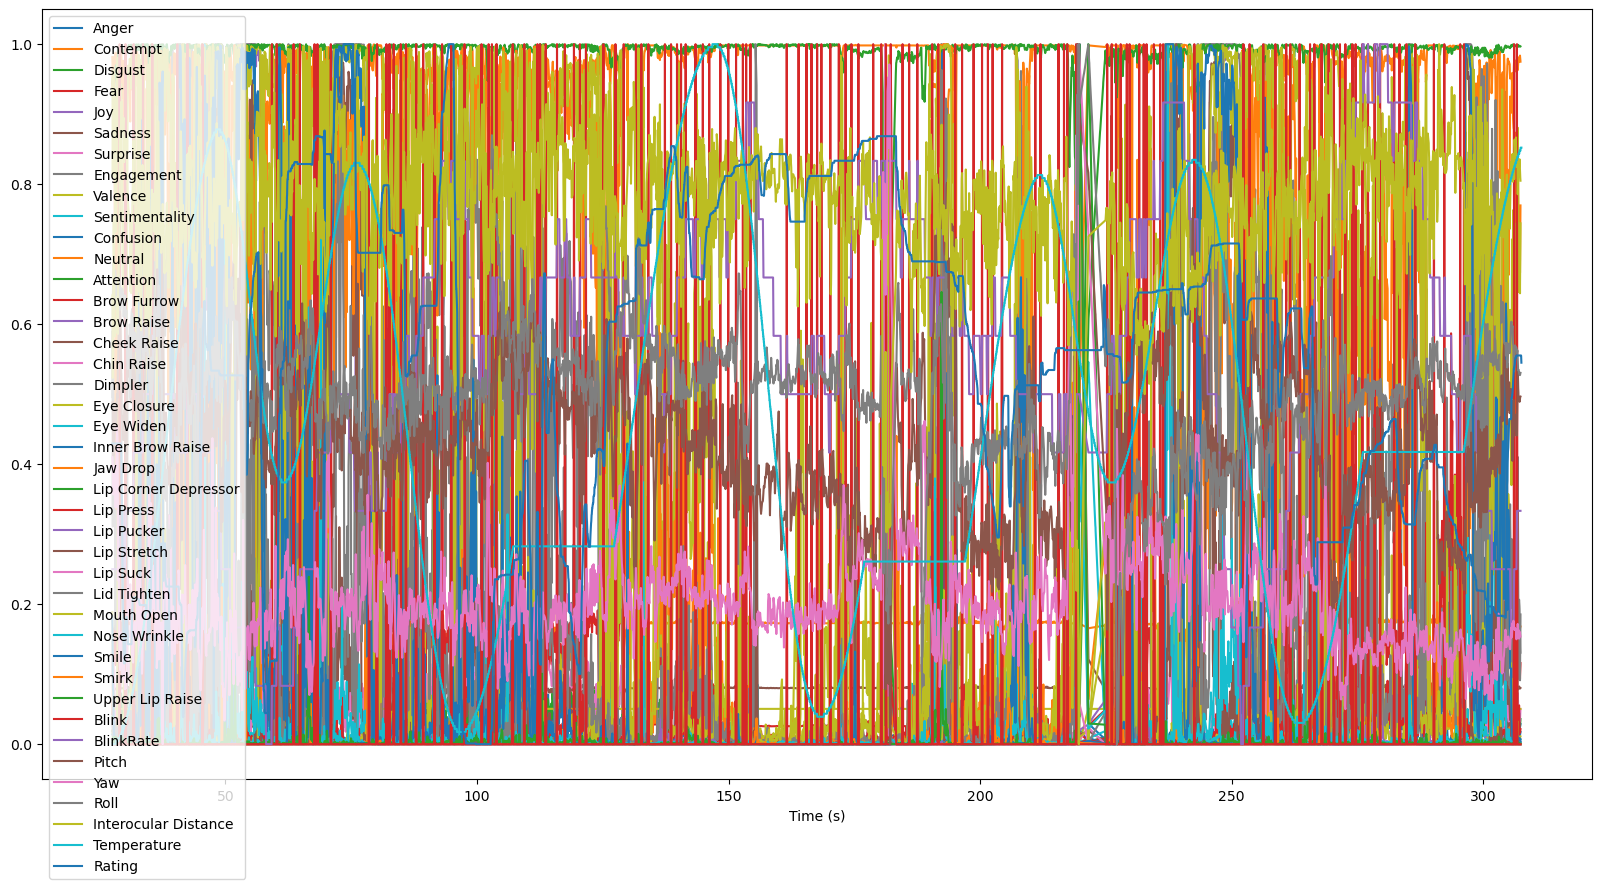

In [ ]:
plot_trial_matplotlib(merged, trial=0)

In [ ]:
plot_data_panel(merged)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

17:53:51 | WARNING | param.main | backend option not found for line plot with plotly; similar options include: []


INFO:bokeh.server.server:Starting Bokeh server version 3.3.3 (running on Tornado 6.3.3)
INFO:bokeh.server.tornado:User authentication hooks NOT provided (default user enabled)
DEBUG:bokeh.server.tornado:These host origins can connect to the websocket: ['localhost:18508']
DEBUG:bokeh.server.tornado:Patterns are:
DEBUG:bokeh.server.tornado:  [('/favicon.ico',
DEBUG:bokeh.server.tornado:    <class 'bokeh.server.views.ico_handler.IcoHandler'>,
DEBUG:bokeh.server.tornado:    {'app': <bokeh.server.tornado.BokehTornado object at 0x136967710>}),
DEBUG:bokeh.server.tornado:   ('/?',
DEBUG:bokeh.server.tornado:    <class 'panel.io.server.DocHandler'>,
DEBUG:bokeh.server.tornado:    {'application_context': <bokeh.server.contexts.ApplicationContext object at 0x12e7a5410>,
DEBUG:bokeh.server.tornado:     'bokeh_websocket_path': '/ws'}),
DEBUG:bokeh.server.tornado:   ('/ws',
DEBUG:bokeh.server.tornado:    <class 'bokeh.server.views.ws.WSHandler'>,
DEBUG:bokeh.server.tornado:    {'application_context

Launching server at http://localhost:18508


INFO:tornado.access:200 GET / (127.0.0.1) 737.22ms
INFO:tornado.access:200 GET /static/extensions/panel/bundled/jquery/jquery.slim.min.js (127.0.0.1) 1.41ms
INFO:tornado.access:200 GET /static/js/bokeh.min.js?v=f43c49e86dc38c1a13b9f41aad15fb57c3b2f70844817e5559b32d9e0a177c319416281f7bac18181198884ceb3998420b37b2b0199e0d0dc6485e34fc0a28dc (127.0.0.1) 6.55ms
INFO:tornado.access:200 GET /static/js/bokeh-gl.min.js?v=bf37f0b457d54fefb6ca8423c37db6ae69479153907d223a22f57d090b957998e75abda056bf5b0916a24f99930fa6df3b242a1a3a0986b549fbc966c1e04416 (127.0.0.1) 6.90ms
INFO:tornado.access:200 GET /static/js/bokeh-widgets.min.js?v=3c2dbaf226dc96c10bf3dfbcde30557363d2c16ec86bf2a10fb615e53d3971cbcf801e5051aa500292ec49f54812deae2aec9aaad0d97331534c89fe18ede89a (127.0.0.1) 7.28ms
INFO:tornado.access:200 GET /static/extensions/panel/bundled/plotlyplot/plotly-2.18.0.min.js (127.0.0.1) 46.66ms
INFO:tornado.access:200 GET /static/js/bokeh-tables.min.js?v=7849f2320ea741465a49857765873105e961ae71f15b481c5c52

In [10]:
from __future__ import annotations

from abc import ABC, abstractmethod
from typing import List


class Context:
    """
    The Context defines the interface of interest to clients.
    """

    def __init__(self, strategy: Strategy) -> None:
        """
        Usually, the Context accepts a strategy through the constructor, but
        also provides a setter to change it at runtime.
        """

        self._strategy = strategy

    @property
    def strategy(self) -> Strategy:
        """
        The Context maintains a reference to one of the Strategy objects. The
        Context does not know the concrete class of a strategy. It should work
        with all strategies via the Strategy interface.
        """

        return self._strategy

    @strategy.setter
    def strategy(self, strategy: Strategy) -> None:
        """
        Usually, the Context allows replacing a Strategy object at runtime.
        """

        self._strategy = strategy

    def do_some_business_logic(self) -> None:
        """
        The Context delegates some work to the Strategy object instead of
        implementing multiple versions of the algorithm on its own.
        """

        # ...

        print("Context: Sorting data using the strategy (not sure how it'll do it)")
        result = self._strategy.do_algorithm(["a", "b", "c", "d", "e"])
        print(",".join(result))

        # ...


class Strategy(ABC):
    """
    The Strategy interface declares operations common to all supported versions
    of some algorithm.

    The Context uses this interface to call the algorithm defined by Concrete
    Strategies.
    """

    @abstractmethod
    def do_algorithm(self, data: List):
        pass


"""
Concrete Strategies implement the algorithm while following the base Strategy
interface. The interface makes them interchangeable in the Context.
"""


class ConcreteStrategyA(Strategy):
    def do_algorithm(self, data: List) -> List:
        return sorted(data)


class ConcreteStrategyB(Strategy):
    def do_algorithm(self, data: List) -> List:
        return reversed(sorted(data))


if __name__ == "__main__":
    # The client code picks a concrete strategy and passes it to the context.
    # The client should be aware of the differences between strategies in order
    # to make the right choice.

    context = Context(ConcreteStrategyA())
    print("Client: Strategy is set to normal sorting.")
    context.do_some_business_logic()
    print()

    print("Client: Strategy is set to reverse sorting.")
    context.strategy = ConcreteStrategyB()
    context.do_some_business_logic()

Client: Strategy is set to normal sorting.
Context: Sorting data using the strategy (not sure how it'll do it)
a,b,c,d,e

Client: Strategy is set to reverse sorting.
Context: Sorting data using the strategy (not sure how it'll do it)
e,d,c,b,a
